#  House Price Prediction

In [1]:
# basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for train_test_splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# for plottings
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# model selections
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# for evaluating model
from sklearn.metrics import mean_squared_error

# for cross validation
from sklearn.model_selection import cross_val_score

# for saving the model
from joblib import dump,load

In [2]:
housing=pd.read_csv("Housing.csv")

In [3]:
housing.head()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Crim       506 non-null    float64
 1   Zn         506 non-null    float64
 2   Indus      506 non-null    float64
 3   Chas       506 non-null    int64  
 4   Nox        506 non-null    float64
 5   Rm         501 non-null    float64
 6   Age        506 non-null    float64
 7   Dis        506 non-null    float64
 8   Rad        506 non-null    int64  
 9   Tax        506 non-null    int64  
 10  Ptratio    506 non-null    float64
 11  B          506 non-null    float64
 12  Lstat      506 non-null    float64
 13  Medv       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283076,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705582,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.880000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# # Train_Test_Split the dataset

In [6]:
train_set,test_set =train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

404
102


In [7]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing, housing['Chas']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [8]:
# copying the Stratified Shuffled Trained Data in dataset
housing=strat_train_set.copy()

# # Checking Correlations

In [9]:
corr_matrix=housing.corr()
corr_matrix['Medv'].sort_values(ascending=False)

Medv         1.000000
Rm           0.680416
B            0.361761
Zn           0.339741
Dis          0.240451
Chas         0.205066
Age         -0.364596
Rad         -0.374693
Crim        -0.393715
Nox         -0.422873
Tax         -0.456657
Indus       -0.473516
Ptratio     -0.493534
Lstat       -0.740494
Name: Medv, dtype: float64

array([[<AxesSubplot: xlabel='Medv', ylabel='Medv'>,
        <AxesSubplot: xlabel='Rm', ylabel='Medv'>,
        <AxesSubplot: xlabel='Zn', ylabel='Medv'>,
        <AxesSubplot: xlabel='Lstat', ylabel='Medv'>],
       [<AxesSubplot: xlabel='Medv', ylabel='Rm'>,
        <AxesSubplot: xlabel='Rm', ylabel='Rm'>,
        <AxesSubplot: xlabel='Zn', ylabel='Rm'>,
        <AxesSubplot: xlabel='Lstat', ylabel='Rm'>],
       [<AxesSubplot: xlabel='Medv', ylabel='Zn'>,
        <AxesSubplot: xlabel='Rm', ylabel='Zn'>,
        <AxesSubplot: xlabel='Zn', ylabel='Zn'>,
        <AxesSubplot: xlabel='Lstat', ylabel='Zn'>],
       [<AxesSubplot: xlabel='Medv', ylabel='Lstat'>,
        <AxesSubplot: xlabel='Rm', ylabel='Lstat'>,
        <AxesSubplot: xlabel='Zn', ylabel='Lstat'>,
        <AxesSubplot: xlabel='Lstat', ylabel='Lstat'>]], dtype=object)

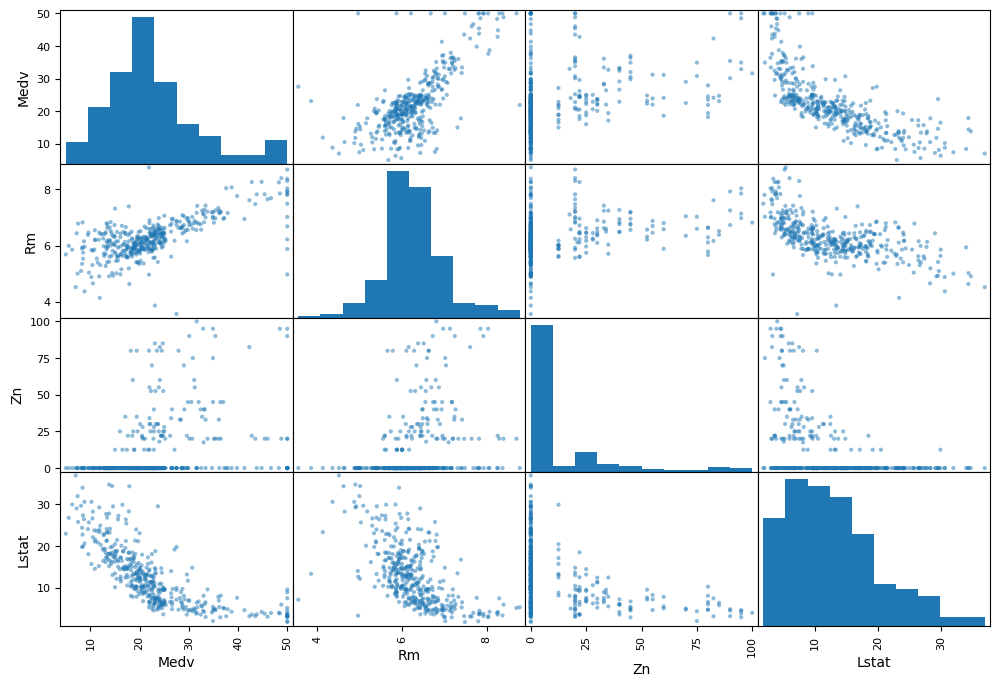

In [10]:
# plotting to see the correlations
attributes= ["Medv","Rm","Zn","Lstat"]
scatter_matrix(housing[attributes] ,figsize=(12,8))

In [11]:
housing=strat_train_set.drop("Medv",axis=1)
housing_labels=strat_train_set["Medv"].copy()

# # Taking Care of Missing Attributes

In [12]:
median=housing["Rm"].median()
housing["Rm"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: Rm, Length: 404, dtype: float64

# # Pipeline Creation

In [13]:
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     we can add as many as we want
    ('std_scaler' ,StandardScaler ())
])

In [14]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

# # Selecting a Desired Model

In [15]:
# checking different models

# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [16]:
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)
rmse

1.1707467152578854

# # Cross Validation

In [17]:
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([2.72540398, 2.80634   , 4.29668752, 2.45306735, 3.36868926,
       2.61246835, 4.79868313, 3.38521848, 3.05101426, 3.1811296 ])

In [18]:
def print_scores(scores):
    print("Scores:" ,scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ",scores.std())

In [19]:
print_scores(rmse_scores)

Scores: [2.72540398 2.80634    4.29668752 2.45306735 3.36868926 2.61246835
 4.79868313 3.38521848 3.05101426 3.1811296 ]
Mean:  3.267870193484204
Standard deviation:  0.7128165143363877


In [20]:
X_test=strat_test_set.drop("Medv", axis=1)
Y_test=strat_test_set["Medv"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

2.8837011569760644

# # Saving The model

In [21]:
dump(model, 'HousePricePrediction.joblib')

['HousePricePrediction.joblib']

# # Testing the model with test data

In [26]:
features=np.array([[0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03

]])
# features=[]
# print("Enter the features one by one-->")
# for i in range(1):
#     a=[]
#     for j in range(13):
#         a.append(float(input()))
#     features.append(a)
features_transform=my_pipeline.transform(features)
arr=model.predict(features_transform)
print("Price of the House will be-->",arr)

Price of the House will be--> [35.671]


C:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
